In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pointpats

In [2]:
# importing functions that will be used to retrieve data
import functions

# grabbing texas data
df = functions.grab_data_by_state(state='TX', pls_save=True)

print(df.head())

File saved and processed!
   case_id    faa_ors           faa_asn  usgs_pr_id t_state          t_county  \
0  3107778  48-176902  2019-WTW-5128-OE         NaN      TX       Kent County   
1  3107780  48-176802  2019-WTW-5126-OE         NaN      TX       Kent County   
2  3108495  48-178030  2019-WTW-9764-OE         NaN      TX  Stonewall County   
3  3107338  48-176903  2019-WTW-5156-OE         NaN      TX  Stonewall County   
4  3107221  48-178001  2019-WTW-9765-OE         NaN      TX  Stonewall County   

  t_fips   p_name  p_year  p_tnum  ...  t_ttlh t_conf_atr t_conf_loc  \
0  48263  Amadeus  2020.0      96  ...   152.4          3          3   
1  48263  Amadeus  2020.0      96  ...   152.4          3          3   
2  48433  Amadeus  2020.0      96  ...   152.4          3          3   
3  48433  Amadeus  2020.0      96  ...   152.4          3          3   
4  48433  Amadeus  2020.0      96  ...   152.4          3          3   

   t_img_date     t_img_srce      xlong      ylat   ei

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18696 entries, 0 to 18695
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     18696 non-null  int64   
 1   case_id        18696 non-null  int64   
 2   faa_ors        18506 non-null  object  
 3   faa_asn        18543 non-null  object  
 4   usgs_pr_id     7190 non-null   float64 
 5   t_state        18696 non-null  object  
 6   t_county       18696 non-null  object  
 7   t_fips         18696 non-null  int64   
 8   p_name         18696 non-null  object  
 9   p_year         18686 non-null  float64 
 10  p_tnum         18696 non-null  int64   
 11  p_cap          18325 non-null  float64 
 12  t_manu         18325 non-null  object  
 13  t_model        18324 non-null  object  
 14  t_cap          18325 non-null  float64 
 15  t_hh           18214 non-null  float64 
 16  t_rd           18323 non-null  float64 
 17  t_rsa          18323 no

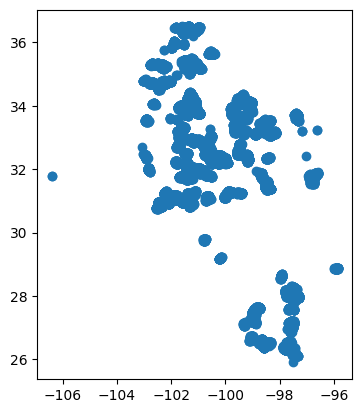

In [3]:
# now let's create a geopandas dataframe while converting the x y coordinates 
big_texas = pd.read_excel('data_files/TX_12_2023.xlsx')
points = gpd.points_from_xy(big_texas['xlong'], big_texas['ylat'])
gdf = gpd.GeoDataFrame(big_texas, geometry = points, crs='EPSG:4326')

print(gdf.info())

gdf.plot()

plt.show()

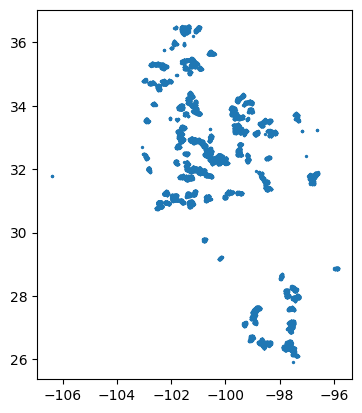

In [4]:
plt.rcParams['figure.dpi'] = 100

gdf.plot(markersize=2)

plt.show()

<Axes: >

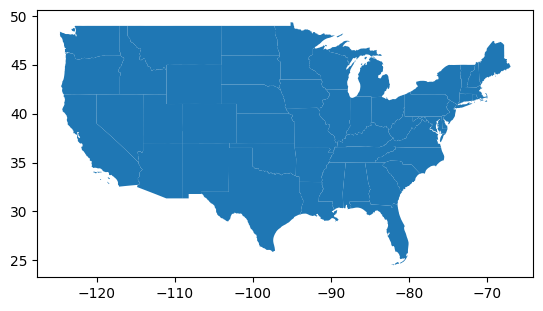

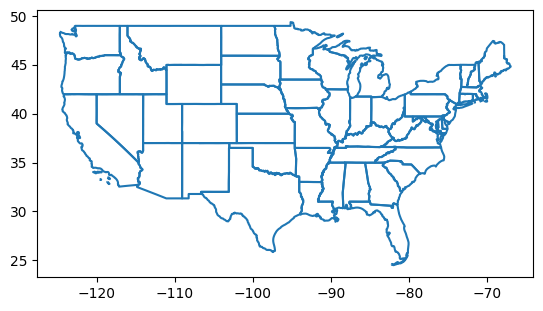

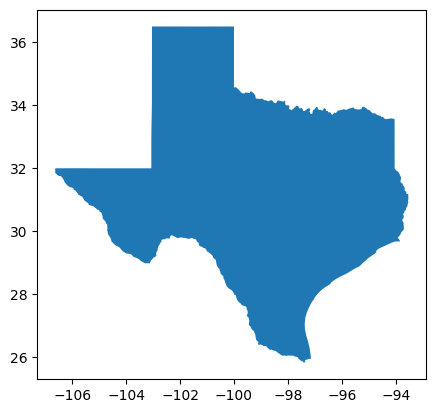

In [5]:
# loading our map outline
states = gpd.read_file('2015-2019-acs-states.geojson')

states = states[~states['ST'].isin(['AK', 'HI', 'PR'])]

states = states.to_crs(gdf.crs)

# plotting states
states.plot()
states.boundary.plot()

# grabbing texas
tejas = states[states['ST'].isin(['TX'])]
tejas.plot()

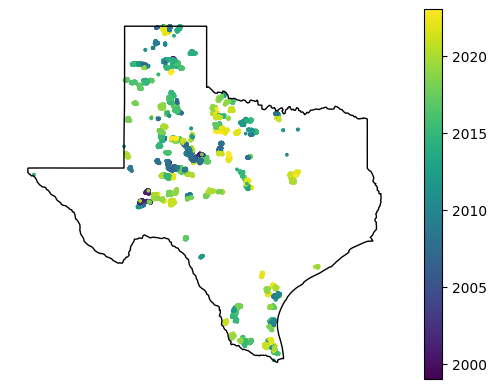

In [6]:
axis = gdf.plot('p_year', markersize=3, legend=True)

tejas.plot(facecolor='none', edgecolor='black', ax=axis)

axis.set_axis_off()

plt.show()

moving on to descriptive stats

In [7]:
# number of rows and columns
print(gdf.shape)

(18696, 29)


In [8]:
# column labels
print(gdf.columns)

Index(['Unnamed: 0', 'case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 't_state',
       't_county', 't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu',
       't_model', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 't_conf_atr',
       't_conf_loc', 't_img_date', 't_img_srce', 'xlong', 'ylat', 'eia_id',
       'retrofit', 'retrofit_year', 'geometry'],
      dtype='object')


In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18696 entries, 0 to 18695
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     18696 non-null  int64   
 1   case_id        18696 non-null  int64   
 2   faa_ors        18506 non-null  object  
 3   faa_asn        18543 non-null  object  
 4   usgs_pr_id     7190 non-null   float64 
 5   t_state        18696 non-null  object  
 6   t_county       18696 non-null  object  
 7   t_fips         18696 non-null  int64   
 8   p_name         18696 non-null  object  
 9   p_year         18686 non-null  float64 
 10  p_tnum         18696 non-null  int64   
 11  p_cap          18325 non-null  float64 
 12  t_manu         18325 non-null  object  
 13  t_model        18324 non-null  object  
 14  t_cap          18325 non-null  float64 
 15  t_hh           18214 non-null  float64 
 16  t_rd           18323 non-null  float64 
 17  t_rsa          18323 no

In [10]:
# listing frequency of values in manufacturer
print(gdf['t_county'].value_counts())


t_county
Nolan County       1411
Willacy County      680
Sterling County     632
Carson County       620
Scurry County       593
                   ... 
Hartley County        2
Collin County         2
Ellis County          1
Brown County          1
Gaines County         1
Name: count, Length: 100, dtype: int64


In [46]:
def top_n(df, group_by, filter_by, n=10):
    """
    Filters the top N entities Pandas DataFrame.
    """

    # Group the DataFrame by company sum
    df_temp = df.groupby(group_by)[filter_by].sum()

    # here we are renaming our column to t_cap
    df_temp = df.groupby(group_by)[filter_by].sum().to_frame(name=filter_by)

    # resetting index
    df_temp = df_temp.reset_index()

    # sortinng values in descending order
    df_temp = df_temp.sort_values(filter_by, ascending=False)

    # Get the top 10 entities
    return df_temp[:n]


tees = top_n(df, group_by='t_manu', filter_by='t_cap')
print(tees)

# tees.to_excel('test.xlsx', index=False)


# converting to % to get better sense of data
# print(gdf['t_manu'].value_counts() / gdf['t_manu'].count()*100)

                             t_manu       t_cap
6                           GE Wind  18873905.0
21                           Vestas   8466670.0
12                           Nordex   3212610.0
18                          Siemens   2758780.0
19  Siemens Gamesa Renewable Energy   2748950.0
11                       Mitsubishi   1681000.0
7                            Gamesa   1364740.0
0                           Acciona    465000.0
20                           Suzlon    221550.0
9                 Goldwind Americas    201600.0


In [12]:
# aggregating values based on categorical values
by_year = gdf.groupby('p_year')['t_cap'].sum()
print(by_year)

p_year
1999.0      35120.0
2001.0     892840.0
2003.0      23000.0
2005.0     259860.0
2006.0     135700.0
2007.0    1344300.0
2008.0    2386200.0
2009.0    2153650.0
2010.0     681300.0
2011.0     260900.0
2012.0    1803680.0
2013.0     141100.0
2014.0    1805190.0
2015.0    3619444.0
2016.0    2564940.0
2017.0    4035935.0
2018.0    2244480.0
2019.0    3922655.0
2020.0    4157645.0
2021.0    3176365.0
2022.0    4437810.0
2023.0     301260.0
Name: t_cap, dtype: float64


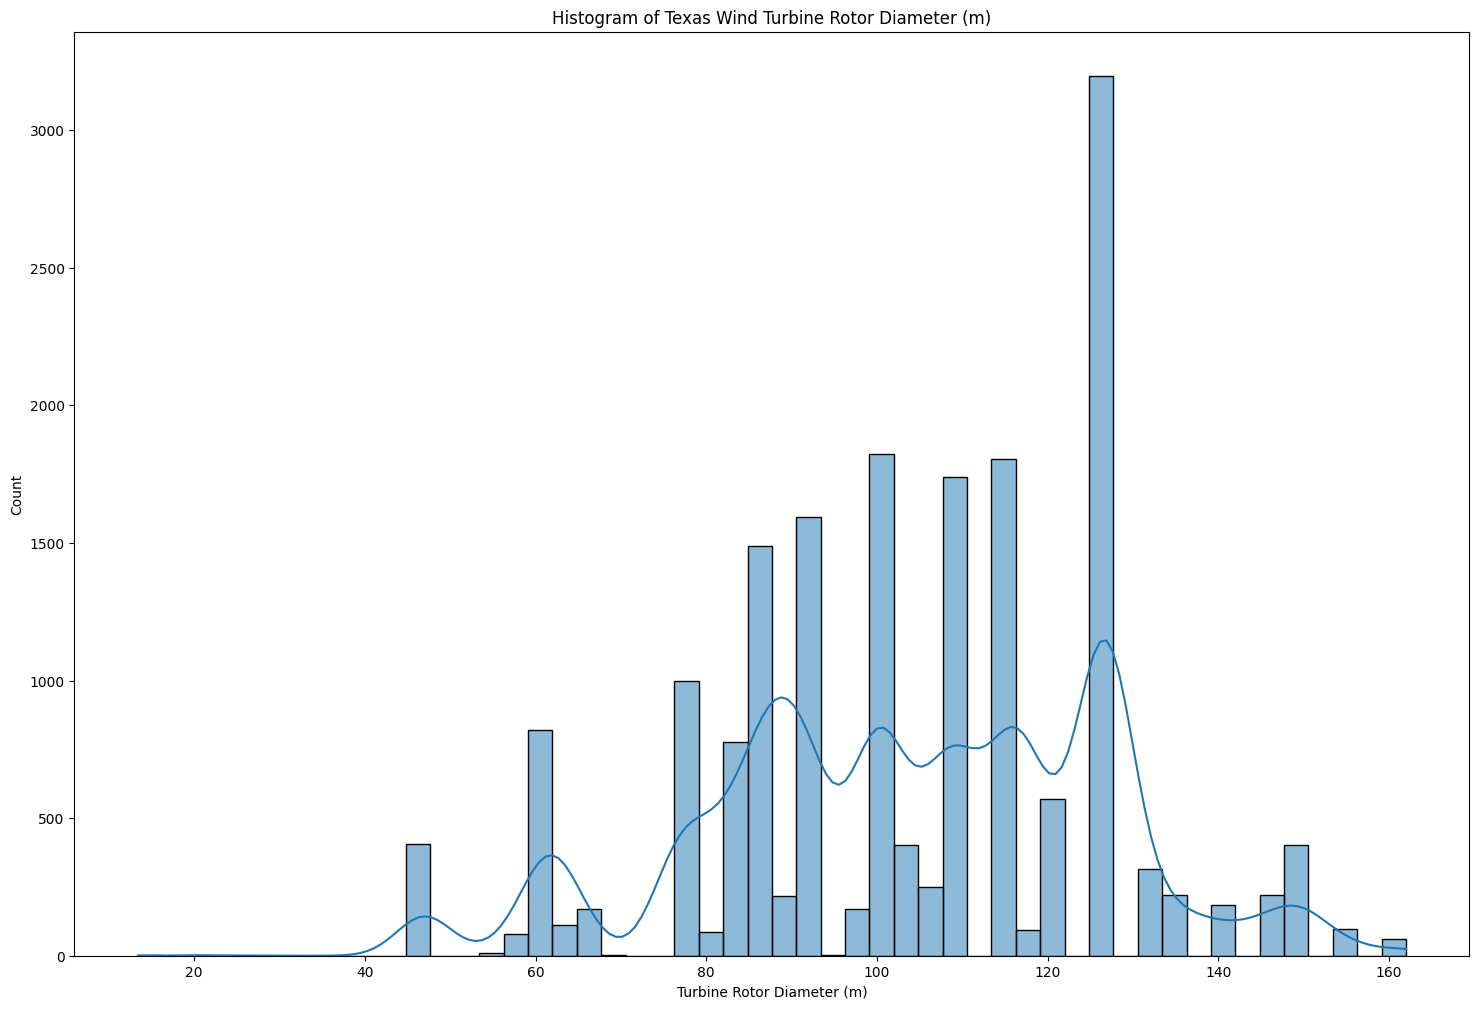

In [13]:
# distribution section
fig = plt.figure()
fig.set_figwidth(18)
fig.set_figheight(12)

sns.histplot(data=gdf, x='t_rd', kde=True, bins='auto')

plt.title('Histogram of Wind Turbine Rotor Diameter (m)')
plt.xlabel('Turbine Rotor Diameter (m)')
# plt.legend(loc='upper right')
plt.show()

def rotor_data(gdf, figw=18, figh=12, hue_by=False):
    '''
    purpose is to present rotor data as histplot
    '''
    fig = plt.figure()
    fig.set_figwidth(figw)
    fig.set_figheight(figh)

    # we are storing the name of the state where this data is set
    state = gdf['t_state'][1]

    if hue_by == '':
        sns.histplot(data=gdf, x='t_rd', kde=True, bins='auto')

    else:
        sns.histplot(data=gdf, x='t_rd', kde=True, bins='auto', 
                     hue=hue_by)
        
    plt.title(f'Histogram of {state} Wind Turbine Rated Capacity (kW)')
    plt.xlabel('Turbine Rated Capacity (kW)')
    plt.show()

    

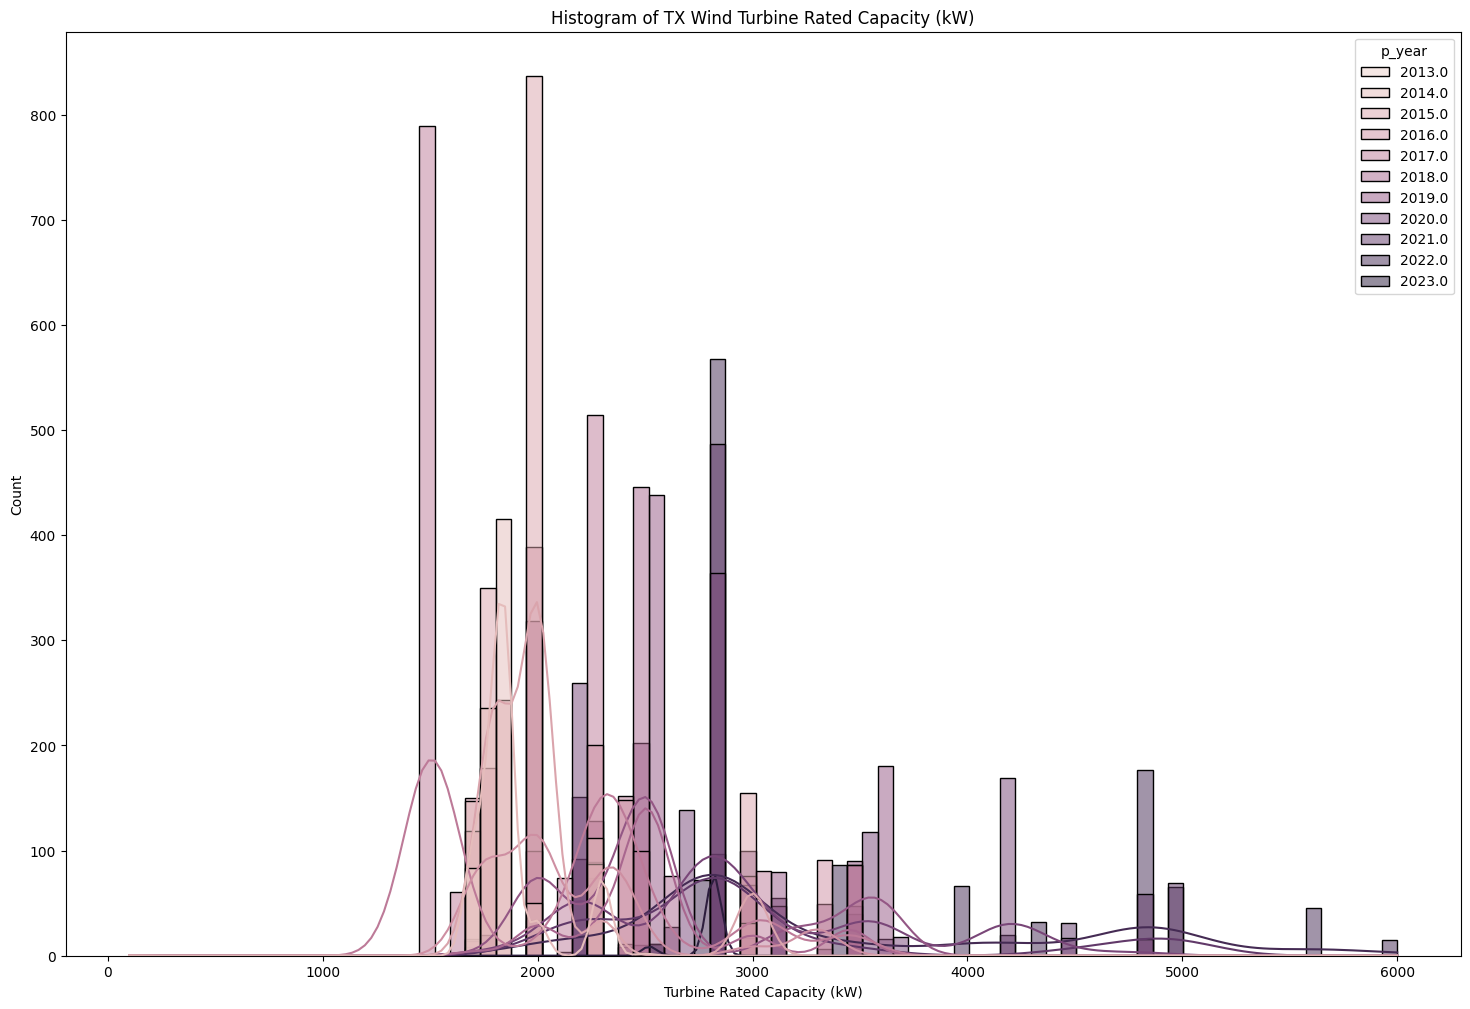

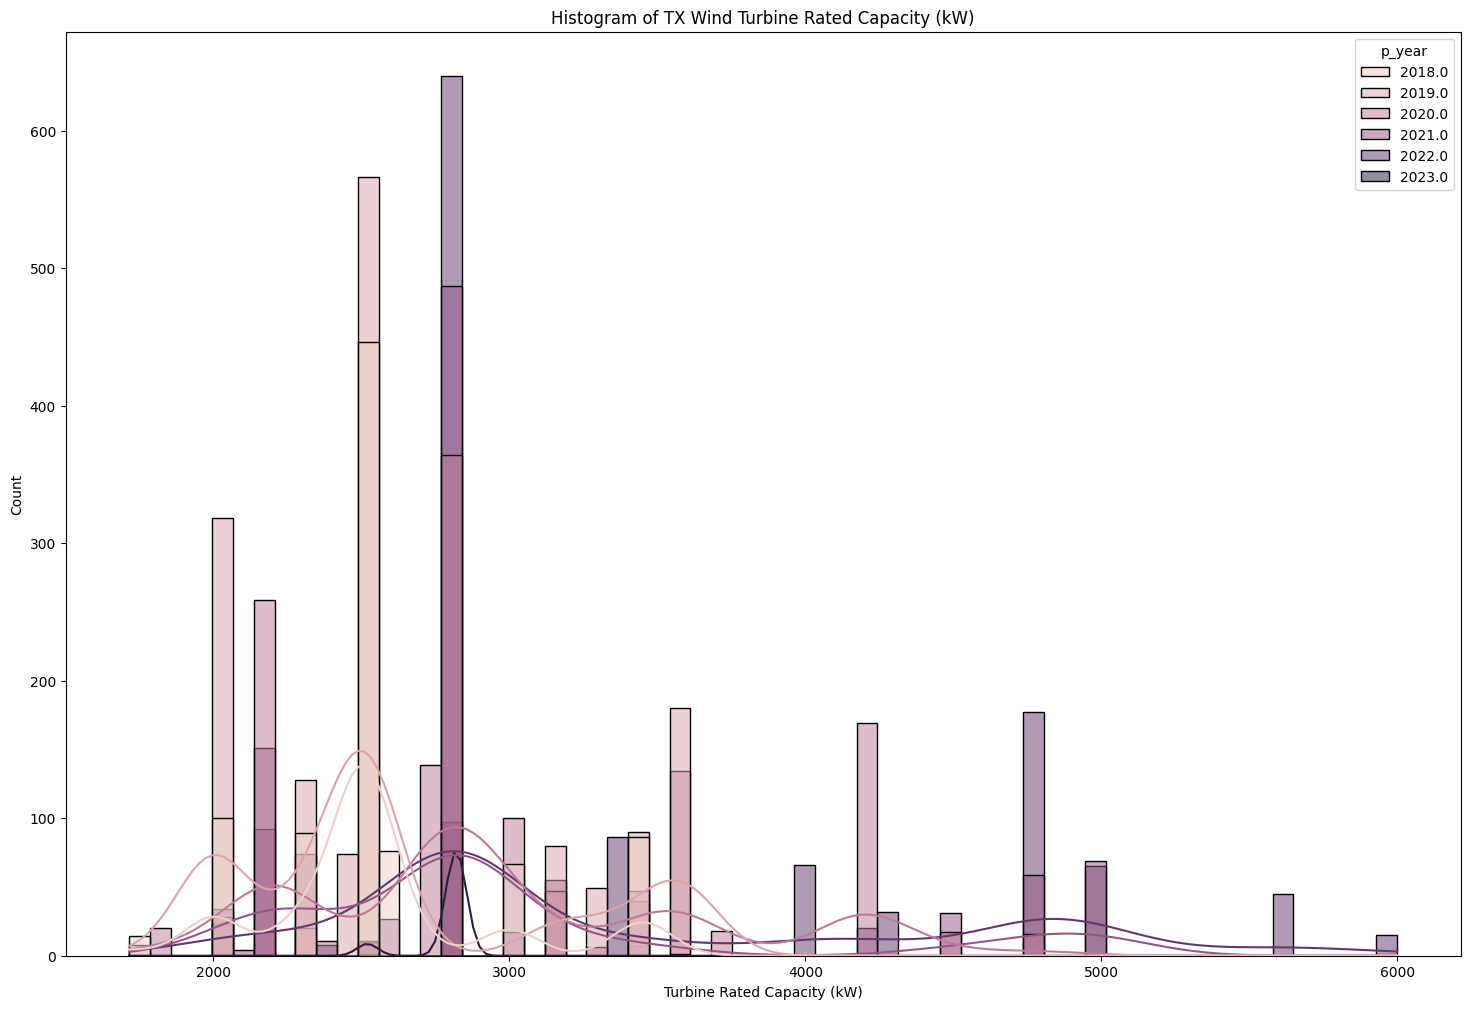

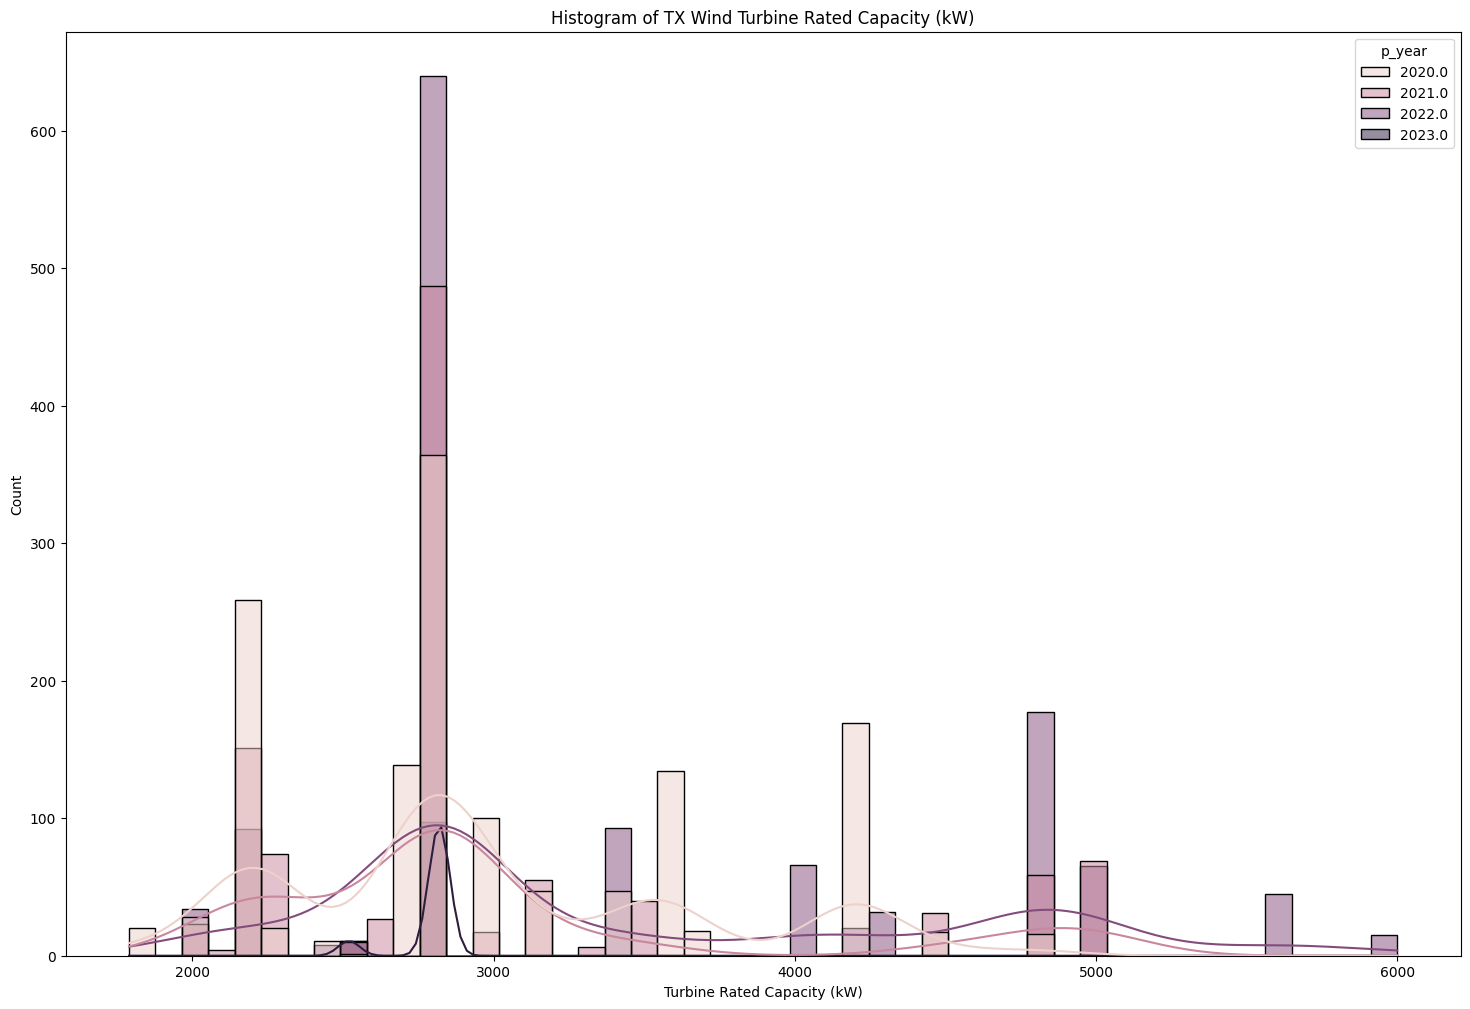

In [19]:
# we only want data for last 10 years (2013 - 2023)
gdf_10y = gdf[gdf['p_year'] >= 2013]
gdf_5y = gdf[gdf['p_year'] >= 2018]
gdf_3y = gdf[gdf['p_year'] >= 2020]


def capacity_data(gdf, figw=18, figh=12, hue_by=False):
    '''
    purpose is to visualize trends in turbine capacity
    '''
    fig = plt.figure()
    fig.set_figwidth(figw)
    fig.set_figheight(figh)

    # we are storing the name of the state where this data is set
    state = gdf['t_state'][1]

    if hue_by == '':
        sns.histplot(data=gdf, x='t_cap', kde=True, bins='auto')

    else:
        sns.histplot(data=gdf, x='t_cap', kde=True, bins='auto', 
                     hue=hue_by)
        
    plt.title(f'Histogram of {state} Wind Turbine Rated Capacity (kW)')
    plt.xlabel('Turbine Rated Capacity (kW)')
    plt.show()


capacity_data(gdf_10y, hue_by='p_year')
capacity_data(gdf_5y, hue_by='p_year')
capacity_data(gdf_3y, hue_by='p_year')


In [ ]:
pointz = np.column_stack((gdf.centroid.x, gdf.centroid.y))

k_test = pointpats.k_test(pointz, keep_simulations=True)

plt.plot(k_test.support, k_test.simulations.T, color='navy', alpha=.01)

plt.plot(k_test.support, k_test.statistic, color='red')

plt.xlabel('Distance')

plt.ylabel('K Function')

plt.show()

C:\Users\AngelSalazar\AppData\Local\Temp\ipykernel_11492\2292349690.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x=gdf.centroid.x,
C:\Users\AngelSalazar\AppData\Local\Temp\ipykernel_11492\2292349690.py:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y=gdf.centroid.y,


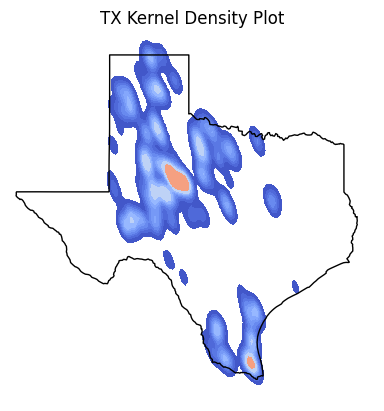

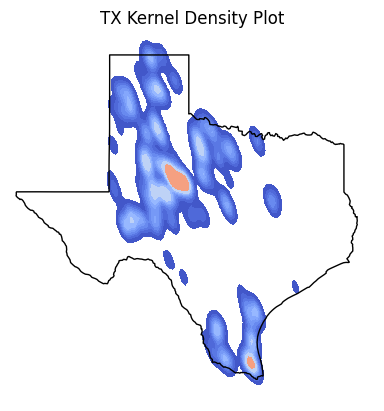

In [22]:
'''
axis = sns.kdeplot(x = gdf.centroid.x, y = gdf.centroid.y,
        fill=True, gridsize=100, bw_adjust=0.5, cmap="coolwarm")

tejas.plot(facecolor="none", edgecolor="gray", ax=axis)

axis.set_axis_off()

plt.title('Kernel Density Plot by Count')
plt.show()
'''

def kde_plot_it(gdf, state_map):
  """
  Purpose is to return a kde plot of data for a particular state
  """

  # creating an instance of state name
  state = gdf['t_state'][7]

  # Create a single seaborn figure
  fig, ax = plt.subplots()

  # Create the kernel density plot
  sns.kdeplot(
      x=gdf.centroid.x,
      y=gdf.centroid.y,
      ax=ax,
      fill=True,
      gridsize=100,
      bw_adjust=0.5,
      cmap="coolwarm",
  )

  # Add the state map
  state_map.plot(ax=ax, facecolor="none", edgecolor="black")

  # Adjust plot settings
  ax.set_axis_off()
  plt.title(f"{state} Kernel Density Plot")

  return fig


kde_plot_it(gdf=gdf, state_map=tejas)
    


C:\Users\AngelSalazar\AppData\Local\Temp\ipykernel_19584\1840424299.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  axis = sns.kdeplot(x = gdf.centroid.x, y = gdf.centroid.y,


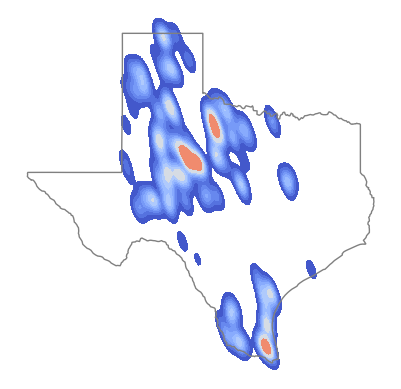

In [58]:
# weighing by t_cap to show clusters around larger turbines


axis = sns.kdeplot(x = gdf.centroid.x, y = gdf.centroid.y,
        weights = gdf["t_cap"],
        fill=True, gridsize=100, bw_adjust=0.5, cmap="coolwarm")

tejas.plot(facecolor="none", edgecolor="gray", ax=axis)

axis.set_axis_off()

plt.show()